# PHASE 2 PROJECT
## FILM INDUSTRY ANALYSIS

## 1.0 BUSINESS UNDERSTANDING
The film industry is fast-paced,what's popular today might be a flop tomorrow. To succeed in this volatile market, our goal is to create movies with broad audience appeal that will be profitable. 

## 2.0 OBJECTIVES

### 2.1 MAIN OBJECTIVE
`To provide data-driven insights into key factors influencing movie production and profitability`.

### 2.2 SPECIFIC OBJECTIVE
* To determine the top 10 movie production studios by number of movies produced and the profit made by the movies produced.
* To determine the best season to release a movie.
* To determine the relationship between the production budget and profit made.
* to determine the genres with the most produced movies and those with the highest rated movies.
* To determine the top movie directors overall and per genre.
* to determine the highest rated movies


## 3.0 DATA UNDERSTANDING
# IMDb databa
The database has data on audience preferences through ratings and reviews,cast and crew that allows the study of successful projects to understand market trends and genres.
# The Numbers data 
Contains data that allows for the calculation of a movie's profitability by comparing its production budget to its worldwide gross.
This is helping in determining optimal budget ranges for financial success.
# Box Office Mojo
The data provides a detailed breakdown of a film's domestic and foreign gross revenue crucial for understanding a movie's market performance beyond its worldwide total, allowing a company to assess a film's success in specific geographical markets. 

## 4.0 EXPLORATORY DATA ANALYSIS

### 4.1 Importing Required Libraries

In [145]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import itertools 
from numbers import Number
from collections import defaultdict
import sqlite3
import os
import re
import warnings
warnings.filterwarnings('ignore')

### 4.2 Loading The Datasets

In [146]:
#Loading box office mojo data
bom_movie= pd.read_csv('bom.movie_gross.csv')
bom_movie

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [147]:
#displaying tha data's information
bom_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [148]:
#Loading the numbers data
movie_budgets=pd.read_csv('tn.movie_budgets.csv')
movie_budgets


,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


# 4.2 Data cleaning and Preparation.

# 4.2.1 Feature Analysis
This involves:
* Viewing the data to understand it
* Feature Engineering i.e removing commas, white spaces 
* Dropping unnecessary columns.
* Handling missing values.
* Checking for duplicates.
* Merging of dataframes.

In [149]:
movie_budgets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [150]:
#Renaming the column named movie with title
movie_budgets= movie_budgets.rename(columns= {"movie": "title"})
movie_budgets.columns

Index(['id', 'release_date', 'title', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [151]:
#Converting the 'domestic_gross' column in the movie_budgets to interger
movie_budgets['domestic_gross'] = pd.to_numeric(movie_budgets['domestic_gross'], errors='coerce')

#Converting the 'domestic_gross' column in the bom_movie DataFrame
bom_movie['domestic_gross'] = pd.to_numeric(bom_movie['domestic_gross'], errors='coerce')

In [152]:
#Merging the 2 tables from movie_budgets and bom_movies
budgets_financials= pd.merge(movie_budgets, bom_movie, on=['title', 'domestic_gross'], how='outer')

In [153]:
budgets_financials.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9167 entries, 0 to 9166
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   float64
 1   release_date       5782 non-null   object 
 2   title              9167 non-null   object 
 3   production_budget  5782 non-null   object 
 4   domestic_gross     3359 non-null   float64
 5   worldwide_gross    5782 non-null   object 
 6   studio             3382 non-null   object 
 7   foreign_gross      2037 non-null   object 
 8   year               3387 non-null   float64
dtypes: float64(3), object(6)
memory usage: 644.7+ KB


In [154]:
#Statistical summary for categorical data
budgets_financials.describe(include='O')

,release_date,title,production_budget,worldwide_gross,studio,foreign_gross
count,5782,9167,5782,5782,3382,2037
unique,2418,7846,509,5356,257,1204
top,"Dec 31, 2014",Unknown,"$20,000,000",$0,IFC,1200000
freq,24,3,231,367,166,23


In [155]:
#creating a copy of the data
financials_df= budgets_financials.copy(deep= True)


In [156]:
#Feature engineering
#removing '$', '.00', and spaces  from the columnsand creating a list of the columns being modified
fin_modified= ['production_budget', 'domestic_gross', 'worldwide_gross','foreign_gross']

# Loop through the columns for modification
for col in fin_modified:
    # Remove commas, dollar signs, and the ".00" suffix
    # Then, convert the cleaned string values to a float
    financials_df[col] = (
        financials_df[col]
        .astype(str)
        .str.replace(",", "")
        .str.replace("$", "")
        .str.replace(".00", "")
        .astype(float)
    )


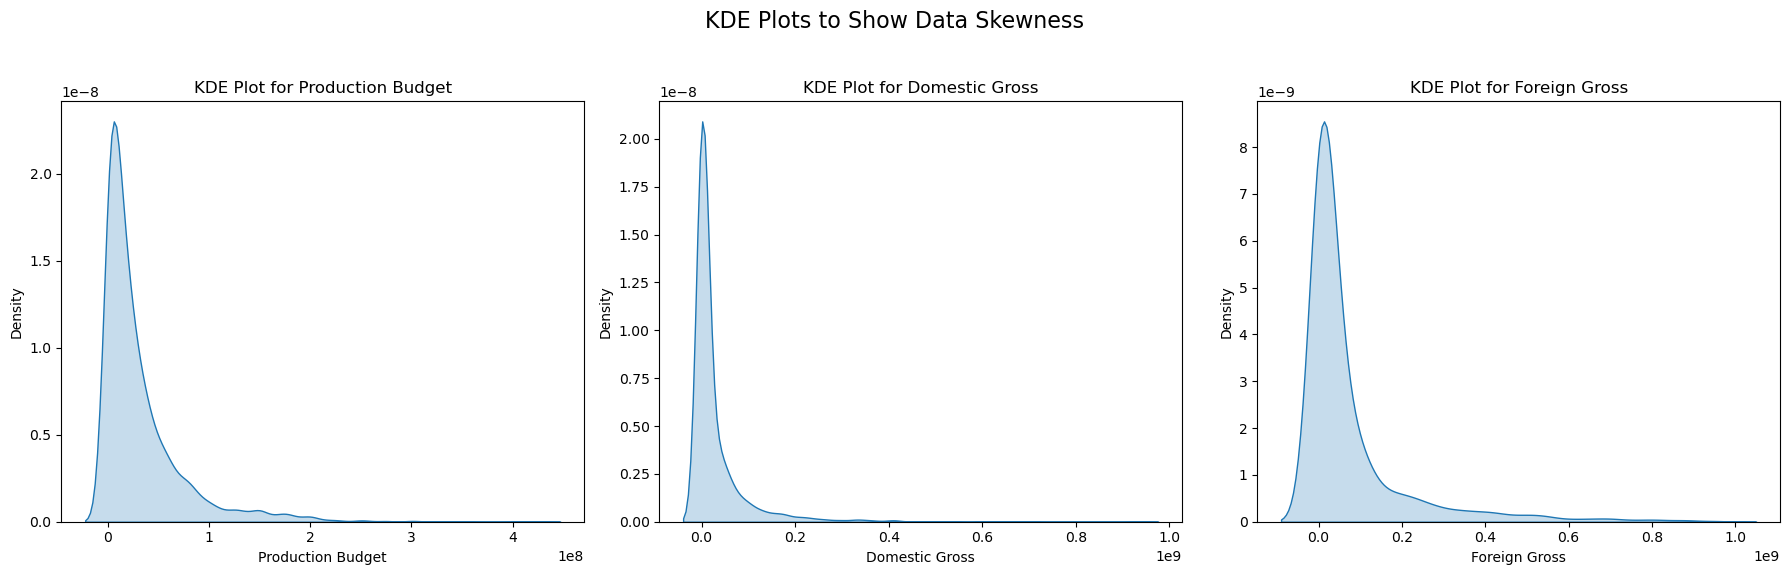

In [157]:
#Showing skewness in the columns production_budget, domestic_gross, worldwide_gross
columns_to_plot = ['production_budget', 'domestic_gross', 'foreign_gross']

fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('KDE Plots to Show Data Skewness', fontsize=16)

    # Loop through the columns and create a plot for each
for i, col in enumerate(columns_to_plot):
        # The `kdeplot` function creates a density plot
        sns.kdeplot(data=financials_df, x=col, fill=True, ax=axes[i])
        axes[i].set_title(f'KDE Plot for {col.replace("_", " ").title()}')
        axes[i].set_xlabel(f'{col.replace("_", " ").title()}')
        axes[i].set_ylabel('Density')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
    

In [158]:
#Filling in missing values using the median
# get the median
median_domestic_gross = financials_df["domestic_gross"].median()

financials_df["domestic_gross"].fillna(median_domestic_gross, inplace=True)

median_production = financials_df["production_budget"].median()
financials_df["production_budget"].fillna(median_production, inplace=True)

median_foreign = financials_df["foreign_gross"].median()
financials_df["foreign_gross"].fillna(median_foreign, inplace=True)

In [159]:
financials_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9167 entries, 0 to 9166
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5782 non-null   float64
 1   release_date       5782 non-null   object 
 2   title              9167 non-null   object 
 3   production_budget  9167 non-null   float64
 4   domestic_gross     9167 non-null   float64
 5   worldwide_gross    5782 non-null   float64
 6   studio             3382 non-null   object 
 7   foreign_gross      9167 non-null   float64
 8   year               3387 non-null   float64
dtypes: float64(6), object(3)
memory usage: 644.7+ KB


In [160]:
#filling missing values in worldwide gross by adding the sum of domestic and foreign gross

#Convert the 'domestic_gross' and 'foreign_gross' columns to numeric.
for col in ['domestic_gross', 'foreign_gross']:
    financials_df[col] = pd.to_numeric(
        financials_df[col].astype(str).str.replace('[$,]', '', regex=True),
        errors='coerce'
    )

#Identifying rows'worldwide_gross' is missing.
missing_gross= financials_df['worldwide_gross'].isnull()

# Filling missing 'worldwide_gross' values by adding foreign and domestic columns.
financials_df.loc[missing_gross, 'worldwide_gross'] = (
    financials_df.loc[missing_gross, 'domestic_gross'] +
    financials_df.loc[missing_gross, 'foreign_gross']
)

In [161]:
#Converting 'release_date' to datetime objects
financials_df['release_date'] = pd.to_datetime(financials_df['release_date'])

# Mapping a month to a season
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:  # December, January, February
        return 'Winter'

financials_df['release_season'] = financials_df['release_date'].dt.month.apply(get_season)


In [162]:
#creating a new column named profit
financials_df['profit'] = financials_df['worldwide_gross'] - financials_df['production_budget']

In [163]:
#dropping the id& year column
financials_df = financials_df.drop(['id','year'], axis=1)

In [164]:
financials_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9167 entries, 0 to 9166
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   release_date       5782 non-null   datetime64[ns]
 1   title              9167 non-null   object        
 2   production_budget  9167 non-null   float64       
 3   domestic_gross     9167 non-null   float64       
 4   worldwide_gross    9167 non-null   float64       
 5   studio             3382 non-null   object        
 6   foreign_gross      9167 non-null   float64       
 7   release_season     9167 non-null   object        
 8   profit             9167 non-null   float64       
dtypes: datetime64[ns](1), float64(5), object(3)
memory usage: 644.7+ KB


In [165]:
#filling the null values in studio and release date with unknown
my_col = {
    'studio': 'unknown',
    'release_date': 'unknown'
}

financials_df.fillna(value=my_col, inplace=True)

In [166]:
financials_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9167 entries, 0 to 9166
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   release_date       9167 non-null   object 
 1   title              9167 non-null   object 
 2   production_budget  9167 non-null   float64
 3   domestic_gross     9167 non-null   float64
 4   worldwide_gross    9167 non-null   float64
 5   studio             9167 non-null   object 
 6   foreign_gross      9167 non-null   float64
 7   release_season     9167 non-null   object 
 8   profit             9167 non-null   float64
dtypes: float64(5), object(4)
memory usage: 644.7+ KB


In [167]:
#Saving the data
financials_df.to_csv ('merged_financials_data.csv', index=False)

# 5.0 DATA ANALYSIS

## 5.1 UNIVARIATE DATA ANALYSIS 

### Top 10 Studios

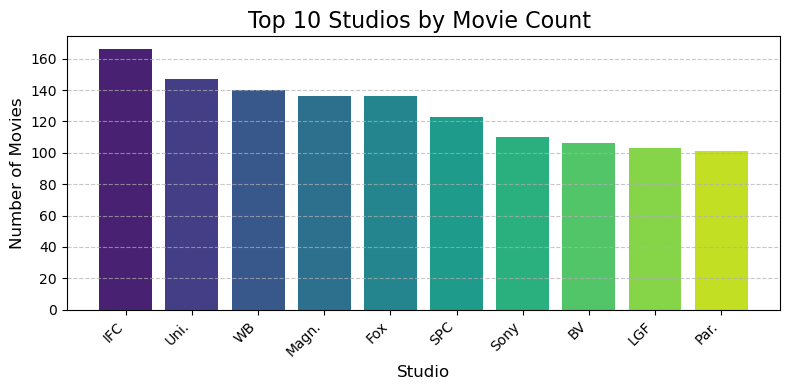

In [169]:
#top 10 studios that produced the most number of movies
filtered_studios = financials_df[financials_df['studio'] != 'unknown']

top_10_studios = filtered_studios['studio'].value_counts().head(10)

plt.figure(figsize=(8, 4))

colors = sns.color_palette('viridis', len(top_10_studios))
plt.bar(top_10_studios.index, top_10_studios.values, color=colors)
# title and labels for the axes.
plt.title('Top 10 Studios by Movie Count ', fontsize=16)
plt.xlabel('Studio', fontsize=12)
plt.ylabel('Number of Movies', fontsize=12)

plt.xticks(rotation=45, ha='right')
# grid lines for better readability.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust plot layout to prevent labels from being cut off.
plt.tight_layout()

# Display the plot.
plt.show()



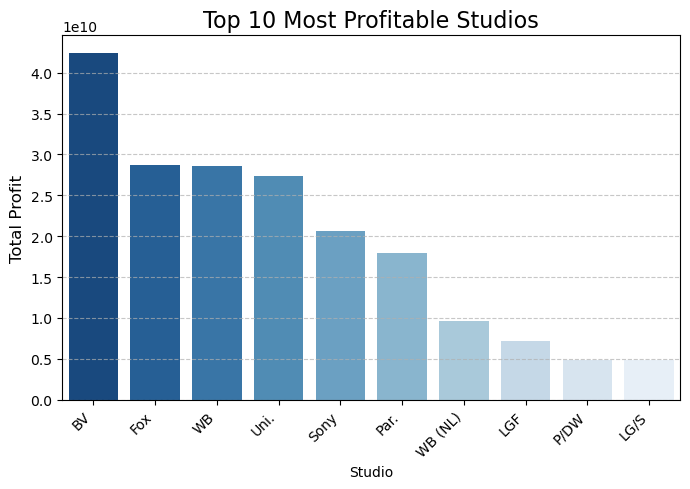

The most profitable studio is 'BV' with a total profit of $42,448,283,899.10.


In [170]:
#top 10 most protitable studios
filtered_df = financials_df[financials_df['studio'] != 'unknown']
studio_profit = filtered_df.groupby('studio')['profit'].sum().sort_values(ascending=False)

top_10_profitable_studios = studio_profit.head(10)


plt.figure(figsize=(7, 5))

colors = sns.color_palette('Blues_r', len(top_10_profitable_studios))
sns.barplot(x=top_10_profitable_studios.index, y=top_10_profitable_studios.values, palette=colors)

# Add a title and labels for the axes.
plt.title('Top 10 Most Profitable Studios', fontsize=16)
plt.xlabel('Studio', fontsize=10)
plt.ylabel('Total Profit', fontsize=12)

# Rotate x-axis labels to prevent them from overlapping.
plt.xticks(rotation=45, ha='right')

# Add grid lines for readability.
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust plot layout to prevent labels from being cut off.
plt.tight_layout()

# Display the plot.
plt.show()

most_profitable_studio_name = top_10_profitable_studios.index[0]
most_profitable_studio_profit = top_10_profitable_studios.values[0]

# Print the result.
print(f"The most profitable studio is '{most_profitable_studio_name}' with a total profit of ${most_profitable_studio_profit:,.2f}.")



## 5.2 BIVARIATE ANALYSIS

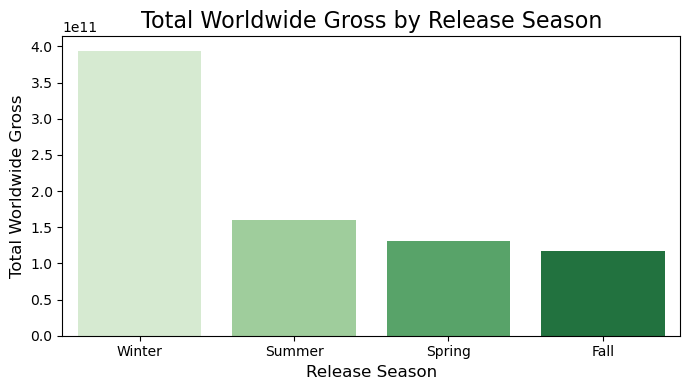

In [171]:
#SEASON WITH THE HIGHEST GROSSING
season_gross = financials_df.groupby('release_season')['worldwide_gross'].sum().sort_values(ascending=False)
plt.figure(figsize=(7, 4))

colors = sns.color_palette('Greens', len(season_gross))
sns.barplot(x=season_gross.index, y=season_gross.values, palette=colors)
# Add a title and labels for the axes.
plt.title('Total Worldwide Gross by Release Season', fontsize=16)
plt.xlabel('Release Season', fontsize=12)
plt.ylabel('Total Worldwide Gross', fontsize=12)
plt.tight_layout()

plt.show()


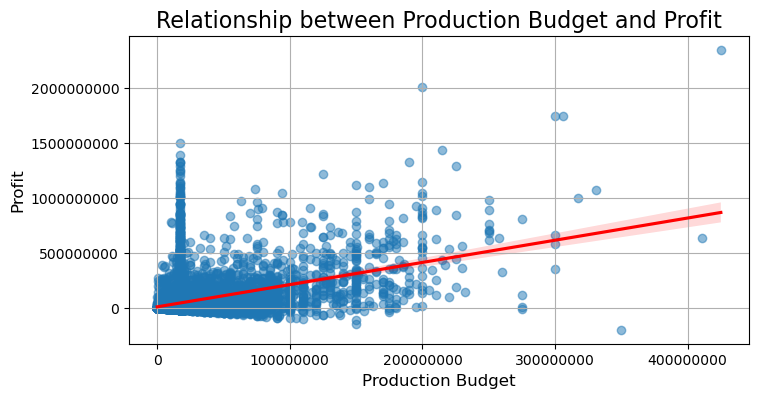

The Pearson correlation coefficient between Production Budget and Profit is: 0.44


In [172]:
#scatter plot with a regression line showing the relation between the movie budget and profit
plt.figure(figsize=(8, 4))

sns.regplot(x='production_budget', y='profit', data=financials_df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Relationship between Production Budget and Profit', fontsize=16)
plt.xlabel('Production Budget', fontsize=12)
plt.ylabel('Profit', fontsize=12)
plt.grid(True)

plt.gca().ticklabel_format(style='plain', axis='x')
plt.gca().ticklabel_format(style='plain', axis='y')
plt.show()

correlation, p_value = stats.pearsonr(financials_df['production_budget'], financials_df['profit'])

# Print the correlation result.
print(f"The Pearson correlation coefficient between Production Budget and Profit is: {correlation:.2f}")



# 6.0 IMBD DATA

## 6.1 EXPLORATORY DATA ANALYSIS OF THE IMDB DATA

In [173]:
#RETRIEVING DATA FROM THE IMDB DATABASE AND THE COLUMN NAMES IN EACH TABLE
conn = sqlite3.connect('im.db')
cursor = conn.cursor()
 
# Get list of available tables
cursor.execute("""SELECT name
                  FROM sqlite_master
                  WHERE type='table';
                  """)
tables = cursor.fetchall()
print("Available tables:", tables)

# Loop through the tables and print the schema for each
for table_name in tables:
    table_name = table_name[0]  # The fetchall() result is a tuple, so we need the first element
    print(f"\n--- Schema for table: {table_name} ---")
    
    # Execute PRAGMA table_info() for the current table
    cursor.execute(f"PRAGMA table_info({table_name});")
    
    # Fetch all the column information
    schema = cursor.fetchall()
    
    # Print the schema details
    for column in schema:
        # The schema tuple contains (cid, name, type, notnull, dflt_value, pk)
        print(f"  - Column Name: {column[1]}, Type: {column[2]}, Not Null: {column[3]}, Primary Key: {column[5]}")



Available tables: [('movie_basics',), ('directors',), ('known_for',), ('movie_akas',), ('movie_ratings',), ('persons',), ('principals',), ('writers',)]

--- Schema for table: movie_basics ---
  - Column Name: movie_id, Type: TEXT, Not Null: 0, Primary Key: 0
  - Column Name: primary_title, Type: TEXT, Not Null: 0, Primary Key: 0
  - Column Name: original_title, Type: TEXT, Not Null: 0, Primary Key: 0
  - Column Name: start_year, Type: INTEGER, Not Null: 0, Primary Key: 0
  - Column Name: runtime_minutes, Type: REAL, Not Null: 0, Primary Key: 0
  - Column Name: genres, Type: TEXT, Not Null: 0, Primary Key: 0

--- Schema for table: directors ---
  - Column Name: movie_id, Type: TEXT, Not Null: 0, Primary Key: 0
  - Column Name: person_id, Type: TEXT, Not Null: 0, Primary Key: 0

--- Schema for table: known_for ---
  - Column Name: person_id, Type: TEXT, Not Null: 0, Primary Key: 0
  - Column Name: movie_id, Type: TEXT, Not Null: 0, Primary Key: 0

--- Schema for table: movie_akas ---
  -

In [174]:
#joining tables movie_basics ,movie_ratings, movie_akas, directors and persons

sql_query = """
SELECT
    T1.primary_title,
    T1.start_year,
    T1.runtime_minutes,
    T1.genres,
    T2.averagerating,
    T2.numvotes,
    T3.ordering,
    T3.title AS akas_title,
    T3.region,
    T3.language,
    T3.types,
    T3.attributes,
    T3.is_original_title,
    T5.primary_name AS director_name,
    T5.birth_year AS director_birth_year,
    T5.primary_profession AS director_profession
FROM
    movie_basics AS T1
JOIN
    movie_ratings AS T2 ON T1.movie_id = T2.movie_id
JOIN
    movie_akas AS T3 ON T1.movie_id = T3.movie_id
JOIN
    directors AS T4 ON T1.movie_id = T4.movie_id
JOIN
    persons AS T5 ON T4.person_id = T5.person_id;
"""

imdb_df = pd.read_sql_query(sql_query, conn)

# Close the connection
conn.close()
 

In [175]:
#checking data summary
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 722938 entries, 0 to 722937
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   primary_title        722938 non-null  object 
 1   start_year           722938 non-null  int64  
 2   runtime_minutes      695593 non-null  float64
 3   genres               720595 non-null  object 
 4   averagerating        722938 non-null  float64
 5   numvotes             722938 non-null  int64  
 6   ordering             722938 non-null  int64  
 7   akas_title           722938 non-null  object 
 8   region               612649 non-null  object 
 9   language             100918 non-null  object 
 10  types                421778 non-null  object 
 11  attributes           49407 non-null   object 
 12  is_original_title    722938 non-null  float64
 13  director_name        722938 non-null  object 
 14  director_birth_year  356093 non-null  float64
 15  director_professi

In [176]:
#dropping columns that I dont  need
imdb_df.drop(columns=['start_year', 'ordering', 'akas_title', 'language', 'types', 'attributes', 'director_birth_year','director_profession', 'is_original_title',], inplace=True, errors='ignore')
imdb_df.columns

Index(['primary_title', 'runtime_minutes', 'genres', 'averagerating',
       'numvotes', 'region', 'director_name'],
      dtype='object')

## 6.2 DATA CLEANING

In [177]:
#renamimg columns
new_column_names = {
    'averagerating': 'average_rating',
    'numvotes': 'num_votes',
    'primary_title': 'title',
}
# Use the .rename() method to apply the new names.
imdb_df.rename(columns=new_column_names, inplace=True)
print(imdb_df.columns)

Index(['title', 'runtime_minutes', 'genres', 'average_rating', 'num_votes',
       'region', 'director_name'],
      dtype='object')


In [178]:
#Filling the missing runtime values with the mean
average_runtime = imdb_df['runtime_minutes'].mean()

imdb_df['runtime_minutes'].fillna(average_runtime, inplace=True)

In [179]:
#dropping rows with missing values in genre column
imdb_df.dropna(subset=['genres'], inplace=True)

In [180]:
#dropping duplicates in the title column
imdb_df.drop_duplicates(subset=['title'], inplace=True)
imdb_df

,title,runtime_minutes,genres,average_rating,num_votes,region,director_name
0,Sunghursh,175.000000,"Action,Crime,Drama",7.0,77,IN,Harnam Singh Rawail
20,One Day Before the Rainy Season,114.000000,"Biography,Drama",7.2,43,XWW,Mani Kaul
24,The Other Side of the Wind,122.000000,Drama,6.9,4517,BR,Orson Welles
50,Sabse Bada Sukh,102.207143,"Comedy,Drama",6.1,13,IN,Hrishikesh Mukherjee
53,The Wandering Soap Opera,80.000000,"Comedy,Drama,Fantasy",6.5,119,None,Raoul Ruiz
...,...,...,...,...,...,...,...
722915,The Agitation,102.207143,"Drama,Thriller",4.9,14,None,Fereydoun Jeyrani
722918,Watching This Movie Is a Crime,100.000000,"Drama,Thriller",8.1,7,XWW,Reza Zehtabchian
722923,BADMEN with a good behavior,87.000000,"Comedy,Horror",9.2,5,DE,Loco Meisenkaiser
722926,Pengalila,111.000000,Drama,8.4,600,None,T.V. Chandran


In [181]:
#Filling the null values in the region column with Unkown
imdb_df['region'].replace('', np.nan, inplace=True)

imdb_df['region'].fillna('UNKNOWN', inplace=True)
imdb_df.isna().sum()

title              0
runtime_minutes    0
genres             0
average_rating     0
num_votes          0
region             0
director_name      0
dtype: int64

In [182]:
#splitting merged genres into individual genre
merged_exploded =imdb_df.assign(genre=imdb_df['genres'].str.split(',')).explode('genre')
genre_counts = merged_exploded['genre'].value_counts()
print(genre_counts)

genre
Drama          27484
Documentary    15962
Comedy         15689
Thriller        7172
Horror          6774
Action          6270
Romance         5884
Crime           4189
Biography       3589
Adventure       3538
Family          3117
Mystery         2711
History         2637
Sci-Fi          1990
Fantasy         1951
Music           1793
Animation       1576
Sport           1042
War              779
Musical          636
News             556
Western          250
Reality-TV        15
Adult              3
Game-Show          2
Name: count, dtype: int64


In [183]:
#saving the data
imdb_df.to_csv('cleaned_imbd.csv', index=False)

### 6.3 DATA ANALYSIS

In [184]:
#our data is now clean
#we make a copy of the data
imdb_data= imdb_df.copy(deep= True)

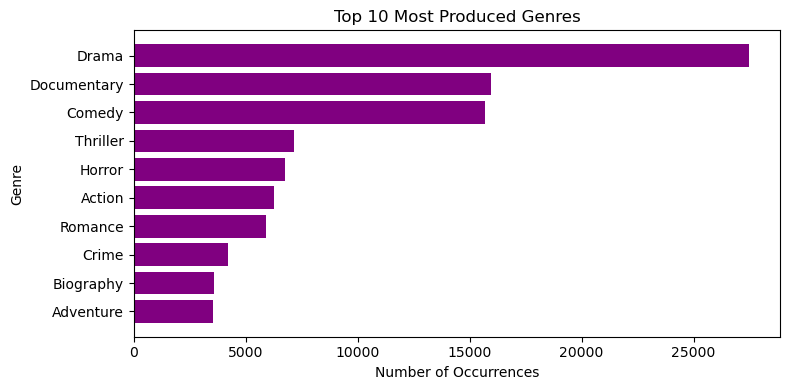

In [185]:

top_10_genres = genre_counts.nlargest(10)
# Create a horizontal bar chart for better readability
plt.figure(figsize=(8, 4))
plt.barh(top_10_genres.index, top_10_genres.values, color='purple')

# Add titles and labels for clarity
plt.title('Top 10 Most Produced Genres')
plt.xlabel('Number of Occurrences')
plt.ylabel('Genre')

# Invert the y-axis to display the most popular genre at the top
plt.gca().invert_yaxis()

# Ensure the labels don't get cut off
plt.tight_layout()

# Display the plot
plt.show()

Text(0.5, 1.0, 'Top 10 Genres with the Highest Average Ratings')

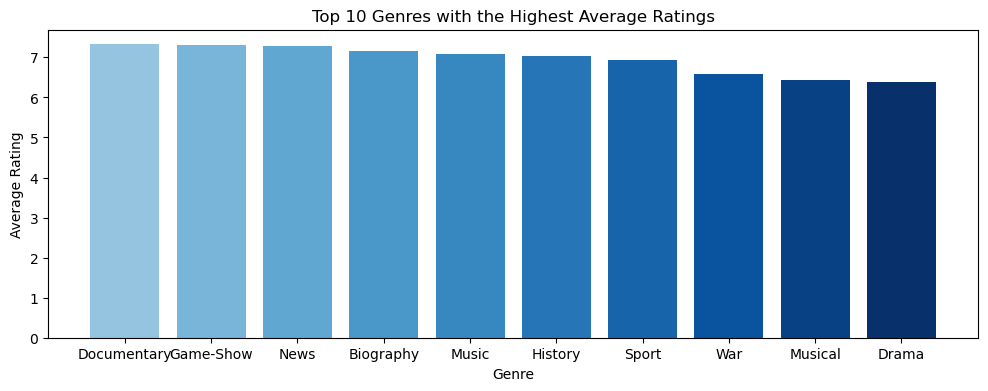

In [186]:
average_ratings_by_genre = merged_exploded.groupby('genre')['average_rating'].mean().sort_values(ascending=False)

top_10_genres = average_ratings_by_genre.head(10)
colors = plt.cm.Blues(np.linspace(0.4, 1, len(top_10_genres)))
#Create the bar chart
plt.figure(figsize=(12, 4))
plt.bar(top_10_genres.index, top_10_genres.values, color=colors)
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.title('Top 10 Genres with the Highest Average Ratings')


(np.float64(-1.099999680050605),
 np.float64(1.0999999849777107),
 np.float64(-1.0999996539052144),
 np.float64(1.0999984168497667))

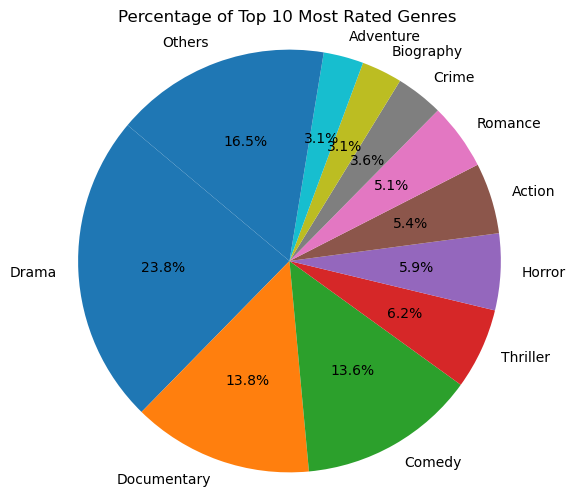

In [187]:
# percentage of top 10 highly rated movies genres produced vis a vis others
top_10_genres = genre_counts.head(10)
others_count = genre_counts.iloc[10:].sum()

pie_data = top_10_genres.copy()
pie_data['Others'] = others_count

genre_percentages = (pie_data / pie_data.sum()) * 100

plt.figure(figsize=(6, 6))
plt.pie(genre_percentages, labels=pie_data.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Top 10 Most Rated Genres ')
plt.axis('equal')  # Ensures the pie chart is a perfect circle.
#plt.savefig('Percentage of Top 10 Most Rated Genres ', bbox_inches='tight')



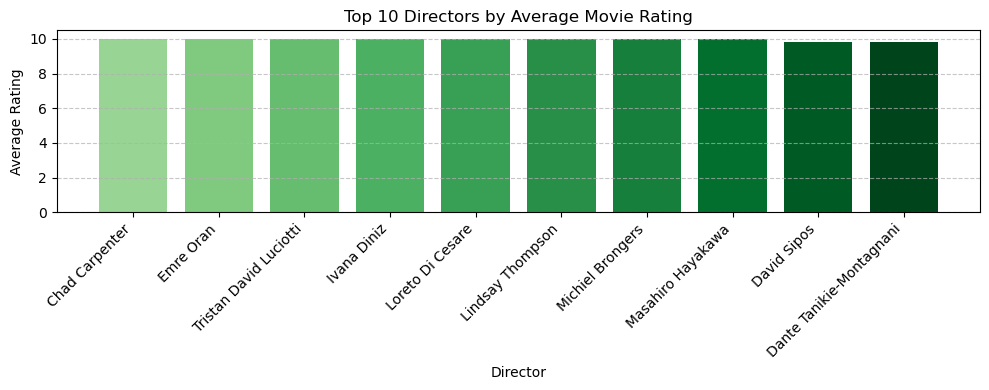

<Figure size 640x480 with 0 Axes>

In [188]:
#top 10 directors
highest_rated_directors= imdb_data.groupby('director_name')['average_rating'].mean().sort_values(ascending=False)
top_10 = highest_rated_directors.head(10)
colors = plt.cm.Greens(np.linspace(0.4, 1, len(top_10)))
plt.figure(figsize=(10, 4))
plt.bar(top_10.index, top_10.values, color=colors)
plt.xlabel('Director')
plt.ylabel('Average Rating')
plt.title('Top 10 Directors by Average Movie Rating')

plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()
plt.savefig('Top 10 Directors by Average Movie Rating')

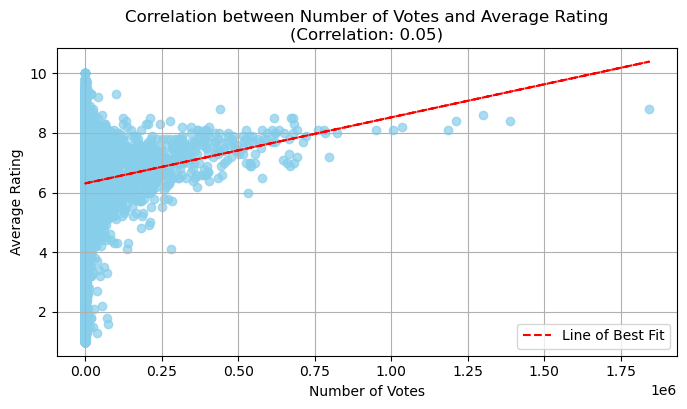

In [189]:
#correlation between num votes and average ratings
#average rating: A measure of perceived quality
#num votes; total count of individual ratings a title has received. measure of popularity and reliability
correlation_coefficient = imdb_data['num_votes'].corr(imdb_df['average_rating'])

# Create a scatter plot
plt.figure(figsize=(8, 4))
plt.scatter(imdb_data['num_votes'], imdb_data['average_rating'], alpha=0.7, color='skyblue')

# Add a line of best fit (regression line)
z = np.polyfit(imdb_data['num_votes'], imdb_data['average_rating'], 1)
p = np.poly1d(z)
plt.plot(imdb_data['num_votes'], p(imdb_data['num_votes']), "r--", label='Line of Best Fit')

# Add titles and labels for clarity
plt.title(f'Correlation between Number of Votes and Average Rating\n(Correlation: {correlation_coefficient:.2f})')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.legend()
plt.grid(True)
plt.savefig('correlation_plot.png') 

# Display the plot
plt.show()



### There is a correlation between the rating and the popularity of a movie

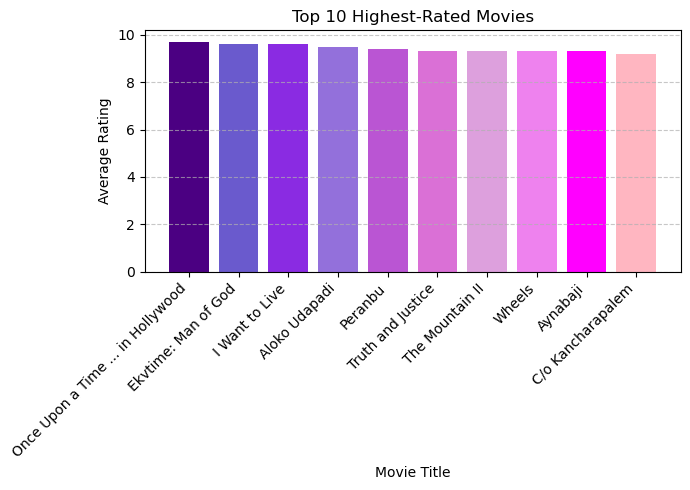

In [190]:
# Individual movies with highest rating
#setting min vote threshold
min_votes = 1000
reliable_movies_df = imdb_data[imdb_data['num_votes'] > min_votes].copy()
highest_rated_movies = reliable_movies_df.sort_values(by='average_rating', ascending=False).head(10)

colors = ['#4B0082', '#6A5ACD', '#8A2BE2', '#9370DB', '#BA55D3', '#DA70D6', '#DDA0DD', '#EE82EE', '#FF00FF', '#FFB6C1']

plt.figure(figsize=(7, 5))
plt.bar(highest_rated_movies['title'], highest_rated_movies['average_rating'], color=colors)

# Set labels and title
plt.xlabel('Movie Title')
plt.ylabel('Average Rating')
plt.title('Top 10 Highest-Rated Movies')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the plot
#plt.savefig('top_10_highest_rated_movies')
plt.show()

plt.show;


In [191]:
#directors with most number of movies per genre
director_movie_counts = merged_exploded.groupby(['genre', 'director_name']).size().reset_index(name='movie_count')

top_directors_per_genre = director_movie_counts.loc[director_movie_counts.groupby('genre')['movie_count'].idxmax()]

top_directors_per_genre = top_directors_per_genre.sort_values(by='movie_count', ascending=False)

print("Directors with the highest number of movies per genre:")
print(top_directors_per_genre)

Directors with the highest number of movies per genre:
             genre               director_name  movie_count
72680       Horror            Nayato Fio Nuala           24
28542  Documentary                 Alex Gibney           19
24162       Comedy             Wenn V. Deramas           16
9077     Animation            William Winckler           15
2485        Action             Koichi Sakamoto           15
60837        Drama                 Tyler Perry           14
27344        Crime             Ram Gopal Varma           14
90808     Thriller                 Larry Rosen           12
82355      Romance            Mae Czarina Cruz           10
75489        Music                Paul Dugdale            9
62337       Family          Arne Lindtner Næss            9
6508     Adventure             Kunihiko Yuyama            8
94400      Western          Christopher Forbes            8
84962       Sci-Fi         Christopher R. Mihm            7
66531      Fantasy              Umanosuke Iid

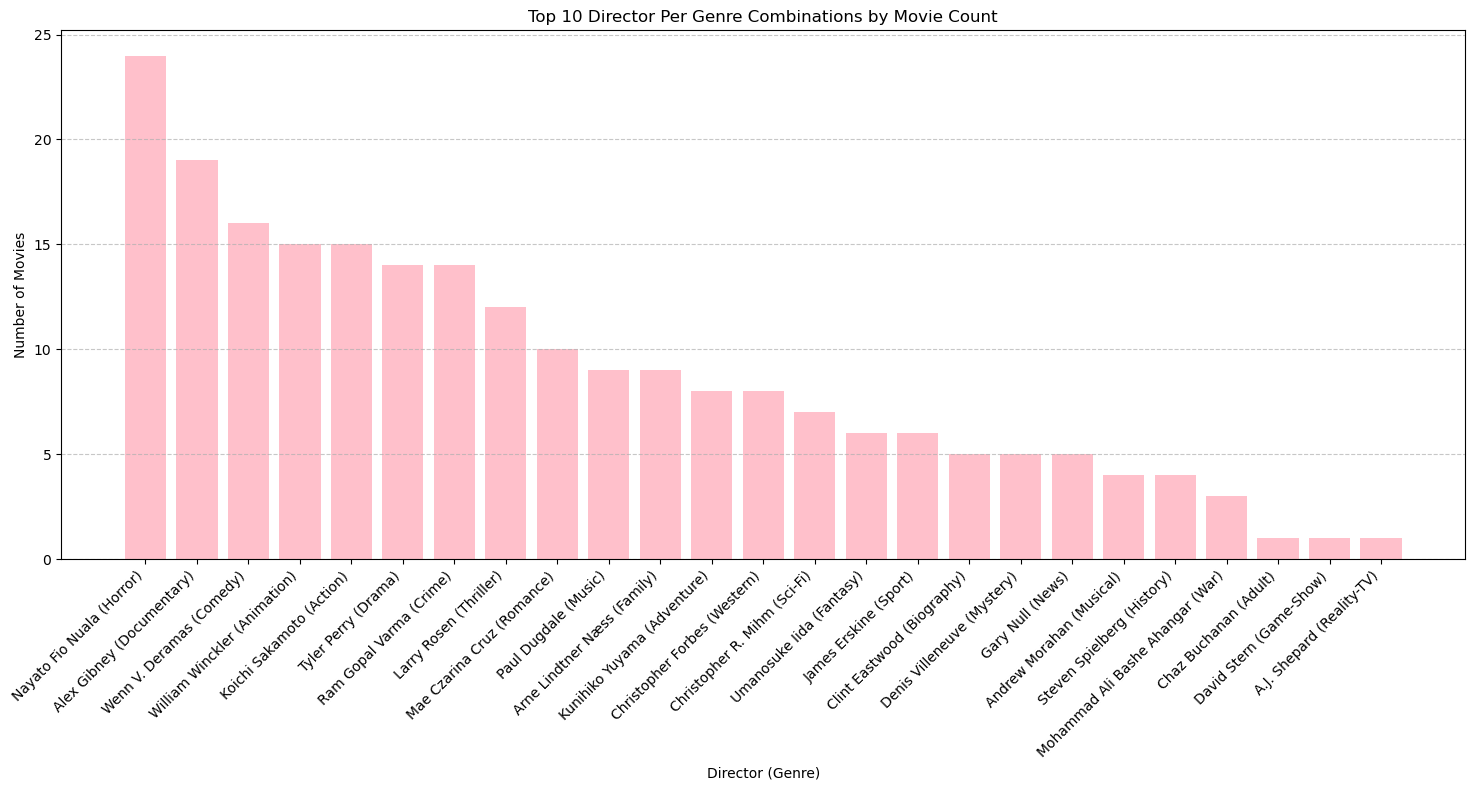

In [192]:
top_directors_per_genre['label'] = top_directors_per_genre['director_name'] + ' (' + top_directors_per_genre['genre'] + ')'
plt.figure(figsize=(15, 8))
plt.bar(top_directors_per_genre['label'], top_directors_per_genre['movie_count'], color='pink')
plt.xlabel('Director (Genre)')
plt.ylabel('Number of Movies')
plt.title('Top 10 Director Per Genre Combinations by Movie Count')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save and display the plot
plt.show()

## 7.0 FINDINGS
* The studios that created many movies are not necessarily te most profitable.
* The best time to release a movie is during the Winter season.
* Production budget has a positive correlation to the profit.
* The most produced genres are not the highest rated.
* The highest rated genres are non-fiction; documentaries,game shows and news

## 8.0 RECOMMENDATIONS
1.Targeting Profitable Genres: A recommendation to focus production of movies in the  documenatries and  drama genre since they have the highest profits. 

2.Optimizing Budget Allocation: Consider the balance of risk and reward.High-budget movies have a higher risk of losing money, while mid-budget films offer a more stable and predictable return.

3.Strategic Release Planning: it is good to consider a season to release a movie based on it's genre.We have seen that most movies do well  during winter.
